In [1]:
import warnings
from tensorflow import keras 

# GPU 사용 설정
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '1'

warnings.filterwarnings('ignore')

In [2]:
from PIL import Image
import numpy as np

---
### chair 전체 이미지의 해상도 평균 구하기

- 파일을 다 가져와서 이미지 사이즈를 다 조절하기.

In [3]:
import glob

In [4]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32) # 파일 가져올때 타입을 정해주는게 좋아
    # print(img.shape[1]) # 잘가져오는지 확인!

    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [5]:
print("chair의 너비 평균 해상도 :", np.max(widthRatio))
print("chair의 높이 평균 해상도 :", np.max(heightRatio))

chair의 너비 평균 해상도 : 300
chair의 높이 평균 해상도 : 300


In [6]:
# 갯수 확인
print(len(widthRatio))
print(len(widthRatio)==len(heightRatio))


62
True


> 너비 : 231, 높이 : 297 로 사용  
- 하지만 아직 컬러 값이니까 gray_r로 바꿔서 사용하자!

---
### chair의 이미지 해상도 변경및 Gray Scale로 적용하기

In [7]:
# Chair의 파일갯수(62개)와 laptop의 파일갯수(81개) 를 60개로 맞추기 
i  = 0 #(이미지 카운트 하다가 60번 넘어가면 스탑, 파일갯수를 카운트함)
for file in sorted(glob.glob("../Data/cnn/chair/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/chairNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    if i >= 60:
        break

---
## Laptop의 이미지 해상도 변경및 Grayscale로 적용하기

In [8]:
# Chair의 파일갯수(62개)와 laptop의 파일갯수(81개) 를 60개로 맞추기 
i  = 0 #(이미지 카운트 하다가 60번 넘어가면 스탑, 파일갯수를 카운트함)
for file in sorted(glob.glob("../Data/cnn/laptop/*.jpg")):
    img = Image.open(file)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/laptopNew/image_%04d.jpg"%i, 'JPEG')
    i+=1
    if i >= 60:
        break

> 이미지 파일 저장하는거 끝났으니 numpy로 바꾸자

---
# chair image를 numpy로 변경하기
- numpy로 사용하려면 아무것도 없는 0 값 데이터들이 먼저 만들어져있어야한다. (자연적 패딩이 되어있대)

In [9]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

- 아무것도 없는 1차원의 검은색 화면을 만들어주자
- 그리고 이미지 차원을 다시 만들어줘야함

In [10]:
chairData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [11]:
chairData.shape

(60, 350, 350)

In [12]:
i = 0

for file in sorted(glob.glob("../Data/cnn/chairNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    chairData[i, 25:-25, 25:-25] = img

In [13]:
chairData.shape

(60, 350, 350)

- 잘들어왔는지 확인하기

In [14]:
# 이미지 확인하기
import matplotlib.pyplot as plt


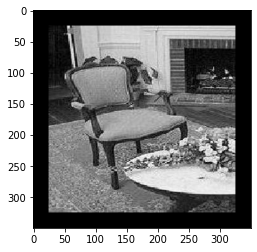

In [15]:

plt.imshow(chairData[0].reshape(350, 350), cmap='gray')
plt.show()

---
## laptop image를 numpy로 변경하기

In [16]:
laptopData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [17]:
laptopData.shape

(60, 350, 350)

In [18]:
i = 0

for file in sorted(glob.glob("../Data/cnn/laptopNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    laptopData[i, 25:-25, 25:-25] = img
    i+=1

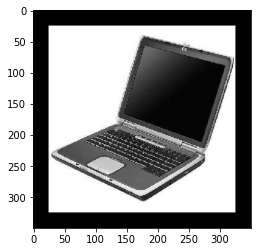

In [19]:
# 이미지 확인하기

plt.imshow(laptopData[0].reshape(350, 350), cmap='gray')
plt.show()

In [20]:
# plt.imshow(laptopData[56].reshape(300, 300), cmap='gray')
# plt.show()

- chairData 와 laptopData를 합치고 정답 만들기를 해야함

---
## piano 추가

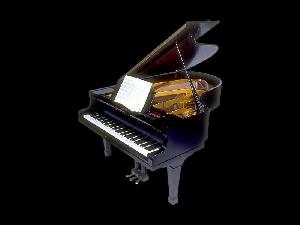

In [21]:
img = Image.open("../Data/cnn/piano/image_0001.jpg")
img

In [22]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32) # 파일 가져올때 타입을 정해주는게 좋아
    # print(img.shape[1]) # 잘가져오는지 확인!
    widthRatio.append(img.shape[1])
    heightRatio.append(img.shape[0])

In [23]:
print("piano 너비 평균 해상도 :", np.max(widthRatio))
print("piano 높이 평균 해상도 :", np.max(heightRatio))

piano 너비 평균 해상도 : 300
piano 높이 평균 해상도 : 300


In [24]:
len(widthRatio)==len(heightRatio)

True

In [25]:
# piano 를 60개로 맞추기 
i  = 0 #(이미지 카운트 하다가 60번 넘어가면 스탑, 파일갯수를 카운트함)
for file in sorted(glob.glob("../Data/cnn/piano/*.jpg")):
    img = Image.open(file)
    # print(img)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/pianoNew/image_%04d.jpg"%i, 'JPEG')
    i+=1

In [26]:
number_of_data = 60
img_width_size = 350
img_height_size = 350

In [27]:
pianoData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [28]:
pianoData.shape

(60, 350, 350)

In [29]:
i = 0

for file in sorted(glob.glob("../Data/cnn/pianoNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    pianoData[i, 25:-25, 25:-25] = img
    i+=1

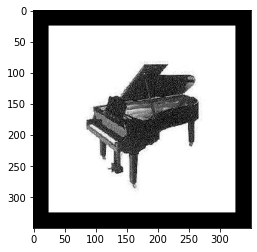

In [30]:
# 이미지 확인하기
plt.imshow(pianoData[3].reshape(350, 350), cmap='gray')
plt.show()

---
## numpy data를 train data로 합치기

In [31]:
train = np.concatenate([chairData, laptopData, pianoData])
train.shape

(180, 350, 350)

In [32]:
target = np.concatenate([np.zeros(60), np.ones(60),np.full(60,2)])
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [33]:
train_scaled = train.reshape(-1, 350, 350) / 255.0

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
trainData, testData, trainTargetData, testTargetData = train_test_split(
    train_scaled, target, test_size=0.2, random_state=30
)

In [36]:
trainData, valData, trainTargetData, valTargetData = train_test_split(
    trainData, trainTargetData, test_size=0.2, random_state=30
)
print(trainData.shape)
print(valData.shape)
print(trainTargetData.shape)
print(valTargetData.shape)

(115, 350, 350)
(29, 350, 350)
(115,)
(29,)


In [37]:
# CNN 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(
        32,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
        input_shape = (350, 350, 1)
    
))

In [38]:
model.add(keras.layers.MaxPool2D(2))

In [39]:
model.add(keras.layers.Conv2D(
        64,
        kernel_size = 3,
        activation = 'relu',
        padding = 'same',
    
))

In [40]:
model.add(keras.layers.MaxPool2D(2))

In [41]:
# 딥러닝 모델 만들기
model.add(keras.layers.Flatten()) # 1차원으로 쫙바뀌고
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.7))
model.add(keras.layers.Dense(3, activation='softmax')) # 마지막 레이어 => 출력층

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 350, 350, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 175, 175, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 175, 175, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 87, 87, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 484416)            0         
                                                                 
 dense (Dense)               (None, 100)               4

In [43]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/cnn/best-chair-cnn-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(
            trainData, 
            trainTargetData,
            epochs=50, 
            validation_data=(valData, valTargetData),
            callbacks=[checkpoint_cb, early_stopping_cb]
        )

Epoch 1/50


2022-07-22 10:01:51.584414: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4/4 [==============================] - 4s 943ms/step - loss: 5.7610 - accuracy: 0.4609 - val_loss: 3.2802 - val_accuracy: 0.5862
Epoch 2/50
4/4 [==============================] - 4s 913ms/step - loss: 5.0655 - accuracy: 0.6435 - val_loss: 0.6646 - val_accuracy: 0.7586
Epoch 3/50
4/4 [==============================] - 4s 920ms/step - loss: 1.0056 - accuracy: 0.5826 - val_loss: 0.6356 - val_accuracy: 0.8621
Epoch 4/50
4/4 [==============================] - 4s 911ms/step - loss: 0.7525 - accuracy: 0.6000 - val_loss: 0.5226 - val_accuracy: 0.8276
Epoch 5/50
4/4 [==============================] - 4s 918ms/step - loss: 0.5884 - accuracy: 0.7565 - val_loss: 0.4888 - val_accuracy: 0.6897
Epoch 6/50
4/4 [==============================] - 4s 923ms/step - loss: 0.4758 - accuracy: 0.7652 - val_loss: 0.4904 - val_accuracy: 0.5862
Epoch 7/50
4/4 [==============================] - 4s 920ms/step - loss: 0.5161 - accuracy: 0.7304 - val_loss: 0.3380 - val_accuracy: 0.9310
Epoch 8/50
4/4 [===============

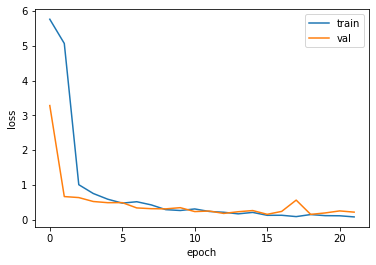

In [44]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

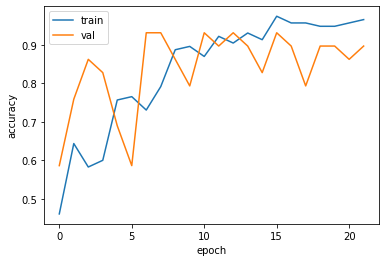

In [45]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [46]:
model.evaluate(valData, valTargetData)

1/1 [==============================] - 0s 229ms/step - loss: 0.1525 - accuracy: 0.8966


[0.15253254771232605, 0.8965517282485962]

---
# test

In [47]:
for file in sorted(glob.glob("../Data/cnn/test/*.jpeg")):
    img = Image.open(file)
    imgResize = img.resize((300, 300), Image.Resampling.LANCZOS) # 이미지 깨짐 방지
    imgResize = imgResize.convert('L') # Grayscale , 만약 투명도가 있는 경우 LA
    imgResize.save("../Data/cnn/testNew/image_%04d.jpg"%i, 'JPEG')
    i+=1


In [48]:
number_of_data = 2
img_width_size = 350
img_height_size = 350

In [49]:
testData = np.zeros(number_of_data * img_width_size * img_height_size, dtype=np.int32).reshape(number_of_data, img_height_size, img_width_size)

In [50]:
i = 0

for file in sorted(glob.glob("../Data/cnn/testNew/*.jpg")):
    img = np.array(Image.open(file), dtype=np.int32)
    testData[i, 25:-25, 25:-25] = img
    i+=1

In [51]:
testData = testData.reshape(-1, 350, 350) / 255.0

In [52]:
classes = ['chair','laptop','piano']

In [53]:
pred = model.predict(valData[0:1])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 63ms/step
piano


In [56]:
pred = model.predict(valData[1:2])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 22ms/step
chair


In [54]:
pred = model.predict(testData[0:1])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 20ms/step
laptop


In [55]:
pred = model.predict(testData[1:2])
print(classes[np.argmax(pred)])

1/1 [==============================] - 0s 21ms/step
laptop
